In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import json
import time

from hiive.mdptoolbox import mdp, example
from mdp import *
import gym
from openai import OpenAI_MDPToolbox # copied from https://github.com/hiive/hiivemdptoolbox/blob/master/hiive/mdptoolbox/openai.py

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display
plt.ion()

"""
Author: Anmolbir Mann 
Email: amann33@gatech.edu 
CS7641 Assignment 4: MDP

This Notebook is mainly for exploring/developing 
see/use final python script, main.py to generate final results
"""

RANDOM_SEED = 1994540101
#np.random.seed(RANDOM_SEED) # keep results consistent

In [2]:
P, R = example.forest(S=500, r1=4, r2=2, p=0.1, is_sparse=False)
problem_name = "Forest"

In [3]:
lake = OpenAI_MDPToolbox('FrozenLake-v0')
P = lake.P 
R = lake.R
problem_name = "FrozenLake"

In [4]:
gammas = [0.99, 0.9]
kargs = {
    "P": P, 
    "R": R,
    "problem_name": problem_name,
    "output": "output"
}

(0, 3, 3, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0)
(0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0)
Problem: FrozenLake
Function: Value_Iteration
Policies for different gamma values:
{'Gamma: 0.99': array([['<', '^', '^', '^'],
       ['<', 'H', '<', 'H'],
       ['^', 'V', '<', 'H'],
       ['H', '>', 'V', 'G']], dtype='<U1'), 'Gamma: 0.9': array([['<', '^', '<', '^'],
       ['<', 'H', '<', 'H'],
       ['^', 'V', '<', 'H'],
       ['H', '>', 'V', 'G']], dtype='<U1')}


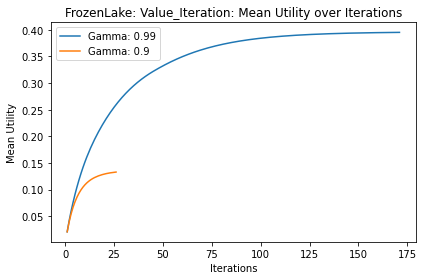

In [5]:
rewards, time, policies = run_iterations(gammas=gammas, value_iter=True, **kargs) # value iteration

In [ ]:
rewards, times, policies = run_qlearnings(P, R, params=[0.95, 0.9], n_iter=1000000, param_alpha=False, show=True, problem_name=problem_name)

In [5]:
def callback(s, a, s_new):
    grid =lake.env.desc.reshape(16)
    state = grid[s_new].decode('UTF-8')
    if state == 'H' or state == 'G':
        return 0
    return s_new

In [7]:
ql, q_results = q_learning(plot=True, **kargs, n_iter=1000000, e_min=0.001, alpha=0.001, e_decay=0.9999, callback=callback)

Q Learning time: 44.369224548339844
policy: [['<' '<' '<' '<']
 ['<' 'H' '<' 'H']
 ['<' '<' '<' 'H']
 ['H' '<' '<' 'G']]
